In [39]:
import requests
import json
import geojson
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

%matplotlib inline

proxies = {'http':''}

recon_time = 70

# Send Request for coastlines
r = requests.get('http://127.0.0.1:8000/rotation/reconstruction_tree_map/?time=%0.2f&model=SETON2012' % recon_time,
                 proxies=proxies)
#print r
tree = json.loads(r.text)

# Send Request for static polygons
r = requests.get('http://127.0.0.1:8000/reconstruct/static_polygons/?time=%0.2f&model=SETON2012' % recon_time,
                 proxies=proxies)
sp = json.loads(r.text)


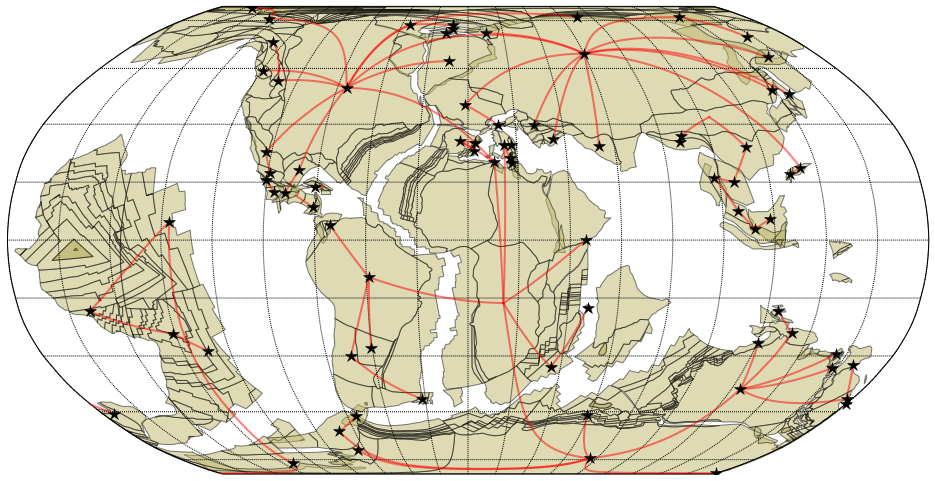

In [40]:
fig = plt.figure(figsize=(16,9))
ax_map = fig.add_axes([0,0,0.8,1.0])
m = Basemap(resolution='c',projection='robin',lon_0=0.,ax=ax_map)
m.drawparallels(np.arange(-80.,90,20.))
m.drawmeridians(np.arange(0.,360.,20.))

for feature in sp['features']:
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    patch = []
    patch.append( Polygon(zip(x,y), True) )
    ax_map.add_collection(PatchCollection(patch, facecolor='darkkhaki', edgecolor='k', alpha=0.5, linewidths=1., zorder=1))
for feature in tree['features']:
    #print feature['geometry']
    coords = feature['geometry']['coordinates']
    xy = zip(*coords[0])
    x,y = m(xy[0],xy[1])
    m.plot(x,y,'r',linewidth=2,zorder=2,alpha=0.5)
    m.plot(x[0],y[0],'k*',zorder=3,markersize=12)
    
plt.show()